In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [365]:
df = pd.read_csv("forest+fires/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [366]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [367]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['month', 'day'])  # Apply OneHotEncoder to 'month' and 'day'
    ],
    remainder='passthrough'  # Keep the other columns untouched
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42))
])

X = df.drop(['area', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  110.8746022737336


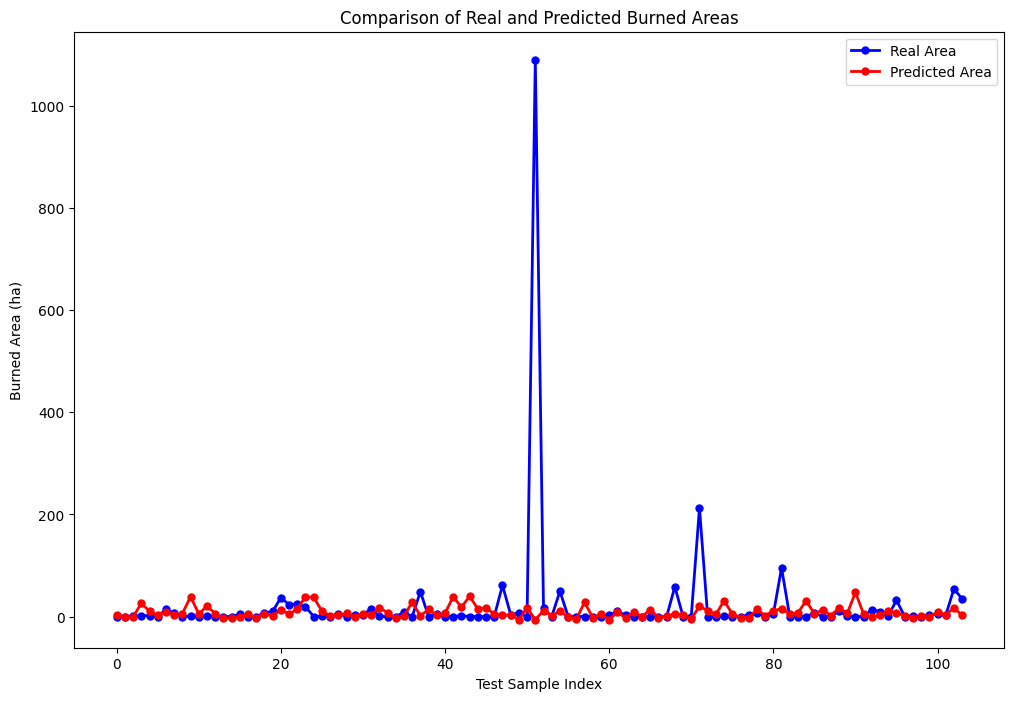

In [368]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(y_test)), y_test, color='blue', label='Real Area', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Area', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Comparison of Real and Predicted Burned Areas')
plt.xlabel('Test Sample Index')
plt.ylabel('Burned Area (ha)')
plt.legend()
plt.show()

In [369]:
data = pd.read_csv("GlobalWeatherRepository.csv")
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [370]:
cols_of_interest = ['country', 'last_updated', 'temperature_celsius', 
                    'wind_kph', 'precip_mm', 'humidity']

In [371]:
data = data[cols_of_interest]
data.head()

,country,last_updated,temperature_celsius,wind_kph,precip_mm,humidity
0,Afghanistan,2023-08-29 14:00,28.8,11.5,0.0,19
1,Albania,2023-08-29 11:30,27.0,6.1,0.0,54
2,Algeria,2023-08-29 10:30,28.0,13.0,0.0,30
3,Andorra,2023-08-29 11:30,10.2,9.7,0.0,51
4,Angola,2023-08-29 10:30,25.0,3.6,0.0,69


In [372]:
data['last_updated'] = pd.to_datetime(data['last_updated'])
data['date'] = data['last_updated'].dt.date

data['month'] = data['last_updated'].dt.month
data['day'] = data['last_updated'].dt.day_name()

data = data.drop('last_updated', axis=1)

In [373]:
data

,country,temperature_celsius,wind_kph,precip_mm,humidity,date,month,day
0,Afghanistan,28.8,11.5,0.00,19,2023-08-29,8,Tuesday
1,Albania,27.0,6.1,0.00,54,2023-08-29,8,Tuesday
2,Algeria,28.0,13.0,0.00,30,2023-08-29,8,Tuesday
3,Andorra,10.2,9.7,0.00,51,2023-08-29,8,Tuesday
4,Angola,25.0,3.6,0.00,69,2023-08-29,8,Tuesday
...,...,...,...,...,...,...,...,...
42261,Venezuela,29.2,3.6,0.00,43,2024-04-06,4,Saturday
42262,Vietnam,24.0,15.1,0.03,100,2024-04-06,4,Saturday
42263,Yemen,20.1,10.1,0.15,54,2024-04-06,4,Saturday
42264,Zambia,24.3,11.2,0.08,66,2024-04-06,4,Saturday


In [374]:
month_to_abbr = {
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
    5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
    9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
}

day_to_abbr = {
    'Monday': 'mon', 'Tuesday': 'tue', 'Wednesday': 'wed',
    'Thursday': 'thu', 'Friday': 'fri', 'Saturday': 'sat', 'Sunday': 'sun'
}

data['month'] = data['month'].map(month_to_abbr)
data['day'] = data['day'].map(day_to_abbr)

data.rename(columns={
    'temperature_celsius': 'temp',
    'wind_kph': 'wind',
    'precip_mm': 'rain',
    'humidity': 'RH'
    }, inplace=True
)

In [375]:
data

,country,temp,wind,rain,RH,date,month,day
0,Afghanistan,28.8,11.5,0.00,19,2023-08-29,aug,tue
1,Albania,27.0,6.1,0.00,54,2023-08-29,aug,tue
2,Algeria,28.0,13.0,0.00,30,2023-08-29,aug,tue
3,Andorra,10.2,9.7,0.00,51,2023-08-29,aug,tue
4,Angola,25.0,3.6,0.00,69,2023-08-29,aug,tue
...,...,...,...,...,...,...,...,...
42261,Venezuela,29.2,3.6,0.00,43,2024-04-06,apr,sat
42262,Vietnam,24.0,15.1,0.03,100,2024-04-06,apr,sat
42263,Yemen,20.1,10.1,0.15,54,2024-04-06,apr,sat
42264,Zambia,24.3,11.2,0.08,66,2024-04-06,apr,sat


In [376]:
data['pred_area'] = model.predict(data.drop(["country", "date"], axis=1))
data

,country,temp,wind,rain,RH,date,month,day,pred_area
0,Afghanistan,28.8,11.5,0.00,19,2023-08-29,aug,tue,3.981300
1,Albania,27.0,6.1,0.00,54,2023-08-29,aug,tue,13.274732
2,Algeria,28.0,13.0,0.00,30,2023-08-29,aug,tue,12.536068
3,Andorra,10.2,9.7,0.00,51,2023-08-29,aug,tue,11.200058
4,Angola,25.0,3.6,0.00,69,2023-08-29,aug,tue,10.581017
...,...,...,...,...,...,...,...,...,...
42261,Venezuela,29.2,3.6,0.00,43,2024-04-06,apr,sat,-5.968067
42262,Vietnam,24.0,15.1,0.03,100,2024-04-06,apr,sat,7.382244
42263,Yemen,20.1,10.1,0.15,54,2024-04-06,apr,sat,9.861879
42264,Zambia,24.3,11.2,0.08,66,2024-04-06,apr,sat,27.299055


In [377]:
needed_data = data[['country', 'date', 'pred_area']]
needed_data

,country,date,pred_area
0,Afghanistan,2023-08-29,3.981300
1,Albania,2023-08-29,13.274732
2,Algeria,2023-08-29,12.536068
3,Andorra,2023-08-29,11.200058
4,Angola,2023-08-29,10.581017
...,...,...,...
42261,Venezuela,2024-04-06,-5.968067
42262,Vietnam,2024-04-06,7.382244
42263,Yemen,2024-04-06,9.861879
42264,Zambia,2024-04-06,27.299055


In [378]:
needed_data.to_json("data.json")

In [255]:
for date in needed_data['date'].unique():
    df_date = needed_data[needed_data['date'] == date]
    
    date_str = pd.to_datetime(date).strftime('%Y-%m-%d')
    
    filename = f"{date_str}.csv"
    
    df_date.drop("date", axis=1).to_csv("./data/" + filename, index=False)
    
    print(f"Saved {filename}")

Saved 2023-08-29.csv
Saved 2023-08-30.csv
Saved 2023-08-31.csv
Saved 2023-09-01.csv
Saved 2023-09-02.csv
Saved 2023-09-03.csv
Saved 2023-09-04.csv
Saved 2023-09-05.csv
Saved 2023-09-06.csv
Saved 2023-09-07.csv
Saved 2023-09-08.csv
Saved 2023-09-09.csv
Saved 2023-09-10.csv
Saved 2023-09-11.csv
Saved 2023-09-12.csv
Saved 2023-09-13.csv
Saved 2023-09-14.csv
Saved 2023-09-15.csv
Saved 2023-09-16.csv
Saved 2023-09-17.csv
Saved 2023-09-18.csv
Saved 2023-09-19.csv
Saved 2023-09-20.csv
Saved 2023-09-21.csv
Saved 2023-09-22.csv
Saved 2023-09-23.csv
Saved 2023-09-24.csv
Saved 2023-09-25.csv
Saved 2023-09-26.csv
Saved 2023-09-27.csv
Saved 2023-09-28.csv
Saved 2023-09-29.csv
Saved 2023-09-30.csv
Saved 2023-10-01.csv
Saved 2023-10-02.csv
Saved 2023-10-03.csv
Saved 2023-10-04.csv
Saved 2023-10-05.csv
Saved 2023-10-06.csv
Saved 2023-10-07.csv
Saved 2023-10-08.csv
Saved 2023-10-09.csv
Saved 2023-10-10.csv
Saved 2023-10-11.csv
Saved 2023-10-12.csv
Saved 2023-10-13.csv
Saved 2023-10-14.csv
Saved 2023-10

**Example of parsing GFS data (takes too long for now)**

In [293]:
import json

with open('data.json', 'r') as file:
    data = json.load(file)

In [294]:
data_entries = []

# Process each coverage
for coverage in data['coverages']:
    domain = coverage['domain']
    x_values = np.linspace(domain['axes']['x']['start'], domain['axes']['x']['stop'], domain['axes']['x']['num'])
    y_values = np.linspace(domain['axes']['y']['start'], domain['axes']['y']['stop'], domain['axes']['y']['num'])
    t_value = domain['axes']['t']['values'][0][:10]  # Extracting the date part
    
    # Process each parameter within this coverage
    for parameter, range_data in coverage['ranges'].items():
        # Skipping direct wind calculation here, will calculate from u and v components later
        if parameter in ["u-component-of-wind", "v-component-of-wind"]:
            continue
            
        # Flatten the parameter values to match each (x, y) pair
        param_values = np.array(range_data['values'])
        
        # For each y, assign param_values to respective x
        idx = 0
        for y in y_values:
            for x in x_values:
                # Find or create the entry for this date, x, y
                entry = next((item for item in data_entries if item["date"] == t_value and item["x"] == x and item["y"] == y), None)
                if not entry:
                    entry = {"date": t_value, "x": x, "y": y}
                    data_entries.append(entry)
                
                entry[parameter] = param_values[idx]
                idx += 1

# Now calculate wind speed for each entry
for entry in data_entries:
    u_comp = next((coverage['ranges']['u-component-of-wind']['values'][idx] for idx, coverage in enumerate(data['coverages']) if 'u-component-of-wind' in coverage['ranges']), None)
    v_comp = next((coverage['ranges']['v-component-of-wind']['values'][idx] for idx, coverage in enumerate(data['coverages']) if 'v-component-of-wind' in coverage['ranges']), None)
    if u_comp and v_comp:
        wind_speed = np.sqrt(u_comp**2 + v_comp**2)
        entry['wind'] = wind_speed

# Convert to DataFrame
expanded_df = pd.DataFrame(data_entries)

# Display the first few rows of the DataFrame to check
expanded_df.head()

KeyboardInterrupt: 

In [289]:
expanded_df

,date,x,y,temperature,relative-humidity,wind
0,2024-04-07,0.00000,-90.0,231.574648,100.0,6.017271
1,2024-04-07,2.00838,-90.0,231.574648,100.0,6.017271
2,2024-04-07,4.01676,-90.0,231.574648,100.0,6.017271
3,2024-04-07,6.02514,-90.0,231.574648,100.0,6.017271
4,2024-04-07,8.03352,-90.0,231.574648,100.0,6.017271
...,...,...,...,...,...,...
48595,2024-04-09,351.46648,90.0,241.522305,25.8,6.017271
48596,2024-04-09,353.47486,90.0,241.592305,25.6,6.017271
48597,2024-04-09,355.48324,90.0,241.652305,25.4,6.017271
48598,2024-04-09,357.49162,90.0,241.712305,25.4,6.017271


In [ ]:
expanded_df['temperature'] = expanded_df['temperature'] - 273.15

expanded_df.rename(columns={
    'temperature': 'temp',
    'relative-humidity': 'RH'
}, inplace=True)

expanded_df.head()

,date,x,y,temp,RH,wind
0,2024-04-07,0.00000,-90.0,-41.575352,100.0,6.017271
1,2024-04-07,2.00838,-90.0,-41.575352,100.0,6.017271
2,2024-04-07,4.01676,-90.0,-41.575352,100.0,6.017271
3,2024-04-07,6.02514,-90.0,-41.575352,100.0,6.017271
4,2024-04-07,8.03352,-90.0,-41.575352,100.0,6.017271


In [ ]:
expanded_df.to_csv("mydata.csv")